In [2]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
! gdown -O food.xlsx  https://drive.google.com/uc?id=1yFE0HJB-71BzpuiR633-JneF7EqNeqVM

Downloading...
From: https://drive.google.com/uc?id=1yFE0HJB-71BzpuiR633-JneF7EqNeqVM
To: /content/food.xlsx
100% 891k/891k [00:00<00:00, 59.0MB/s]


In [4]:
# Reading excel data file in pandas
df = pd.read_excel("food.xlsx")

In [5]:
df.head(3)

,MatvareID,Matvare,Spiselig del,Ref,Vann,Ref.1,Kilojoule,Ref.2,Kilokalorier,Ref.3,Fett,Ref.4,Mettet,Ref.5,C12:0,Ref.6,C14:0,Ref.7,C16:0,Ref.8,C18:0,Ref.9,Trans,Ref.10,Enumettet,Ref.11,C16:1 sum,Ref.12,C18:1 sum,Ref.13,Flerumettet,Ref.14,C18:2n-6,Ref.15,C18:3n-3,Ref.16,C20:3n-3,Ref.17,C20:3n-6,Ref.18,...,Beta-karoten,Ref.37,Vitamin D,Ref.38,Vitamin E,Ref.39,Tiamin,Ref.40,Riboflavin,Ref.41,Niacin,Ref.42,Vitamin B6,Ref.43,Folat,Ref.44,Vitamin B12,Ref.45,Vitamin C,Ref.46,Kalsium,Ref.47,Jern,Ref.48,Natrium,Ref.49,Kalium,Ref.50,Magnesium,Ref.51,Sink,Ref.52,Selen,Ref.53,Kopper,Ref.54,Fosfor,Ref.55,Jod,Ref.56
0,1.013,"Geitmelk, langtidsholdbar",100,0,89,112a,254,61a,61,61b,3.6,112a,2.5,112a,0.1,112a,0.27,112a,1.06,112a,0.33,112a,0.1,112a,0.8,112a,0.04,112a,0.76,112a,0.1,112a,0.06,112a,0.02,112a,0,112a,0,112a,...,3,112a,0,112a,0.1,111a,0.02,112a,0.09,112a,0.4,112a,0.06,108a,0,112a,0,112a,0,20,100,112a,0.1,112a,40,112a,200,112a,15,112a,0.3,112a,1,112a,0.13,112a,110,112a,48.6,325
1,1.272,"Helmelk, 3,5 % fett, laktosefri",100,0,89,112a,237,61a,57,61b,3.5,112a,2.1,112a,0.11,112a,0.35,112a,0.99,112a,0.36,112a,0.1,112a,0.9,112a,0.08,112a,0.71,112a,0.1,112a,0.05,112a,0.01,112a,0,112a,0,112a,...,20,112a,0,112a,0.1,112a,0.02,112a,0.06,112a,0.1,112a,0.03,112a,5,112a,0.6,112a,0,20,120,112a,0,112a,30,112a,160,112a,8,112a,0.3,112a,1,112a,0,112a,91,112a,15.7,325
2,1.001,"Helmelk, 3,5 % fett, Tine",100,0,88,112a,264,61a,63,61b,3.5,112a,2.3,112a,0.11,112a,0.35,112a,0.99,112a,0.36,112a,0.1,112a,0.9,112a,0.08,112a,0.71,112a,0.1,112a,0.05,112a,0.01,112a,0,112a,0,112a,...,20,112a,0,112a,0,112a,0.04,111a,0.15,112a,0,111a,0.04,111a,9,112a,0.6,112a,0,20,130,112a,0,111a,40,112a,171,112a,13,112a,0.4,111a,3,112a,0.02,111a,115,112a,14.8,325


In [6]:
df.columns

Index(['MatvareID', 'Matvare', 'Spiselig del', 'Ref', 'Vann', 'Ref.1',
       'Kilojoule', 'Ref.2', 'Kilokalorier', 'Ref.3',
       ...
       'Sink', 'Ref.52', 'Selen', 'Ref.53', 'Kopper', 'Ref.54', 'Fosfor',
       'Ref.55', 'Jod', 'Ref.56'],
      dtype='object', length=116)

In [7]:
ref_cols = [ x for x in df.columns.to_list() if 'Ref' in x]
cols_to_drop = ['MatvareID', 'Matvare'] + ref_cols

In [8]:
df1 = df.drop(columns=cols_to_drop)

In [9]:
df1.shape

(1878, 57)

In [10]:
df1

,Spiselig del,Vann,Kilojoule,Kilokalorier,Fett,Mettet,C12:0,C14:0,C16:0,C18:0,Trans,Enumettet,C16:1 sum,C18:1 sum,Flerumettet,C18:2n-6,C18:3n-3,C20:3n-3,C20:3n-6,C20:4n-3,C20:4n-6,C20:5n-3 (EPA),C22:5n-3 (DPA),C22:6n-3 (DHA),Omega-3,Omega-6,Kolesterol,Karbohydrat,Stivelse,Mono+disakk,"Sukker, tilsatt",Kostfiber,Protein,Salt,Alkohol,Vitamin A,Retinol,Beta-karoten,Vitamin D,Vitamin E,Tiamin,Riboflavin,Niacin,Vitamin B6,Folat,Vitamin B12,Vitamin C,Kalsium,Jern,Natrium,Kalium,Magnesium,Sink,Selen,Kopper,Fosfor,Jod
0,100,89,254,61,3.6,2.5,0.1,0.27,1.06,0.33,0.1,0.8,0.04,0.76,0.1,0.06,0.02,0,0,0,0,0,0,0,0.02,0.1,11,4.0,0,4,0,0.0,3.1,0.1,0.0,30,30,3,0,0.1,0.02,0.09,0.4,0.06,0,0,0,100,0.1,40,200,15,0.3,1,0.13,110,48.6
1,100,89,237,57,3.5,2.1,0.11,0.35,0.99,0.36,0.1,0.9,0.08,0.71,0.1,0.05,0.01,0,0,0,0,0,0,0,0.02,0.06,10,3.0,0,3,0,0.0,3.3,0.1,0.0,50,48,20,0,0.1,0.02,0.06,0.1,0.03,5,0.6,0,120,0,30,160,8,0.3,1,0,91,15.7
2,100,88,264,63,3.5,2.3,0.11,0.35,0.99,0.36,0.1,0.9,0.08,0.71,0.1,0.05,0.01,0,0,0,0,0,0,0,0.02,0.06,10,4.5,0,4.5,0,0.0,3.4,0.1,0.0,33,31,20,0,0,0.04,0.15,0,0.04,9,0.6,0,130,0,40,171,13,0.4,3,0.02,115,14.8
3,100,87,278,67,3.9,2.7,0.14,0.42,1.16,0.45,0.1,1,0.06,0.84,0.2,0.06,0.02,0,0,0,0,0,0,0,0.02,0.08,10,4.6,0,4.6,0,0.0,3.3,0.1,0.0,38,36,25,0,0.1,0.05,0.15,0.1,0.04,11,0.6,0,120,0,40,180,13,0.6,0,0.02,97,14.8
4,100,87,284,68,4.1,2.6,0.15,0.47,1.18,0.38,0.1,0.9,0.09,0.71,0.1,0.07,0.02,0,0,0,0,0,0,0,0.02,0.07,11,4.5,0,4.5,0,0.0,3.3,0.1,0.0,18,16,22,0,0.1,0.05,0.15,0.1,0.04,11,0.4,0,120,0,35,170,12,0.4,3,0.02,100,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,100,3,1603,380,9.1,3.3,0,0.31,1.78,0.28,0,3.2,0.01,3.15,2,1.85,0.16,0,0,0,0,0,0,0,0.17,1.85,0,59.6,43.1,16.5,14.8,2.7,13.6,0.3,0.0,343,343,0,5,3,0.85,0.61,3.2,0.44,66,0.4,65,530,12,117,350,73,6.1,4,0.5,317,32
1874,100,78,369,87,2.1,0.8,0,0.07,0.42,0.07,0,0.7,0,0.74,0.5,0.44,0.04,0,0,0,0,0,0,0,0.04,0.44,0,13.7,9.9,3.8,3.4,0.6,3.1,0.1,0.0,79,79,0,1.2,0.7,0.2,0.14,0.7,0.1,15,0.1,15,122,2.8,27,80,17,1.4,1,0.12,73,7.4
1875,100,88,278,66,3.2,0.8,0.26,0.09,0.17,0.1,0,1.6,0,1.55,0.6,0.5,0.04,0,0,0,0,0,0,0.02,0.04,0.5,M,8.3,0,8.3,0,0.0,1.1,0.1,0.0,60,M,M,1.7,1.4,0.07,0.17,0.5,0.04,20,0.2,10,65,0.9,32,95,4,0.5,4,0.06,38,13.5
1876,100,88,281,67,3.3,0.8,0.26,0.09,0.17,0.1,0,1.6,0,1.55,0.6,0.5,0.04,0,0,0,0,0,0,0.02,0.04,0.5,M,8.2,0,8.2,0,0.0,1.2,0.1,0.0,62,M,M,1.7,1.4,0.07,0.15,0.5,0.04,19,0.2,10,66,0.9,34,91,4,0.5,3,0.05,40,14.1


In [11]:
df.drop(columns=ref_cols).to_excel('food_1.xlsx',index=False)

In [12]:
df1 = df1.apply(pd.to_numeric, errors='coerce', axis=1).fillna(0)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df1)

In [14]:
from sklearn.cluster import KMeans

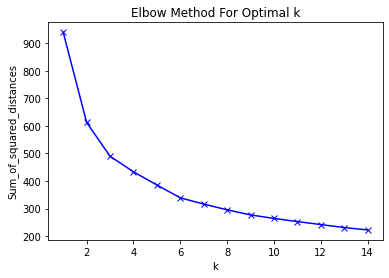

In [30]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(K), y=Sum_of_squared_distances,
                    mode='lines+markers',
                    name='lines+markers'))
fig['layout'].update(height=500, width=1000,title="Optimal Number of Cluster using Elbow Method",xaxis_title="K",yaxis_title="Within Cluster Sum of Squares",)
fig.show()

In [17]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [18]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 6], dtype=int32)

In [19]:
! pip install umap-learn

In [20]:
import umap

In [21]:
UMAP_DR = umap.UMAP().fit_transform(X)

In [22]:
umap_df = pd.DataFrame(UMAP_DR)

In [23]:
def scatter_plot(df):
    plt.scatter(df[:,0], df[:, 1])
    plt.show()

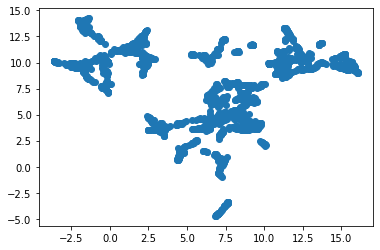

In [24]:
scatter_plot(UMAP_DR)

In [25]:
umap_df['c'] = y_kmeans

In [26]:
umap_df['food_name'] = df['Matvare']

In [27]:
import plotly.express as px

In [28]:
fig = px.scatter(data_frame=umap_df,x=0,y=1,color='c',hover_data=['food_name'])
fig.show()

In [29]:
fig = px.scatter(data_frame=umap_df,x=0,y=1,color='c', text="food_name", size_max=10)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Food Groups', title_x=0.5)
fig.show()